# <font color = 'orange'> Lab | Cleaning categorical data </font>

- Instructions
- Import the necessary libraries if you are starting a new notebook.
- Load the csv. Use the variable customer_df as customer_df = pd.read_csv().
- What should we do with the customer_id column?
- Load the continuous and discrete variables into numericals_df and categorical_df variables, for eg.:
numerical_df = customer_df.select_dtypes()
categorical_df = customer_df.select_dtypes()
- Plot every categorical variable. What can you see in the plots? Note that in the previous lab you used a bar plot to plot categorical data, with each unique category in the column on the x-axis and an appropriate measure on the y-axis. However, this time you will try a different plot. This time in each plot for the categorical variable you will have, each unique category in the column on the x-axis and the target(which is numerical) on the Y-axis
- For the categorical data, check if there is any data cleaning that need to perform. Hint: You can use the function value_counts() on each of the categorical columns and check the representation of different categories in each column. Discuss if this information might in some way be used for data cleaning.

In [41]:
# Import the necessary libraries if you are starting a new notebook.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime

In [42]:
# Load the csv. Use the variable customer_df as customer_df = pd.read_csv().
customer_df=pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

In [43]:
# What should we do with the customer_id column?
# Eliminarla no nos sirve para el analisis, ya que es un identificador unico de cada cliente
customer_df=customer_df.drop(['Customer'],axis=1)


In [44]:
customer_df.head()

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [45]:
# Vamos a poner los nombres de las columnas en minusculas y con _
def clean_headers(x):
  for i in x.columns:
   x.columns = [i.lower().replace(' ','_')  for i in x.columns]
  return x

clean_headers(customer_df)

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [46]:
numerical = customer_df.select_dtypes("number")
categorical = customer_df.select_dtypes("object")


In [47]:
# Plot every categorical variable
# This time in each plot for the categorical variable you will have, each unique category in the column on the x-axis and the target(which is numerical) on the Y-axis
categorical


,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


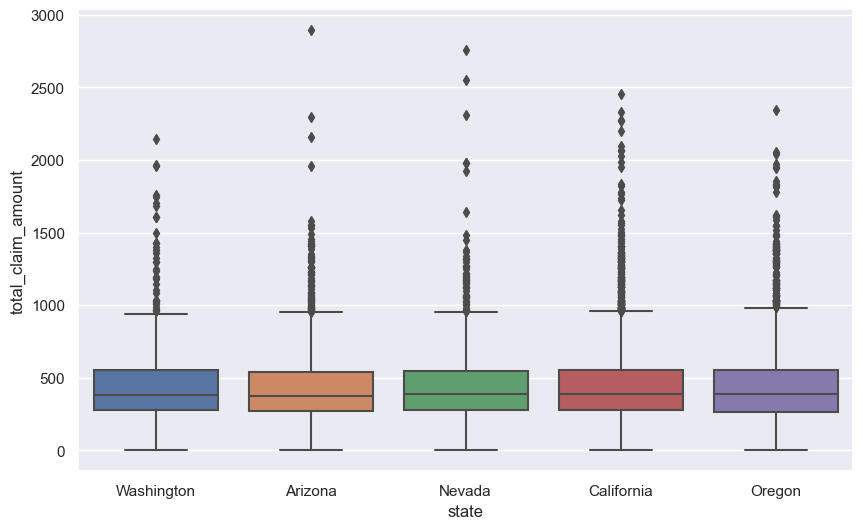

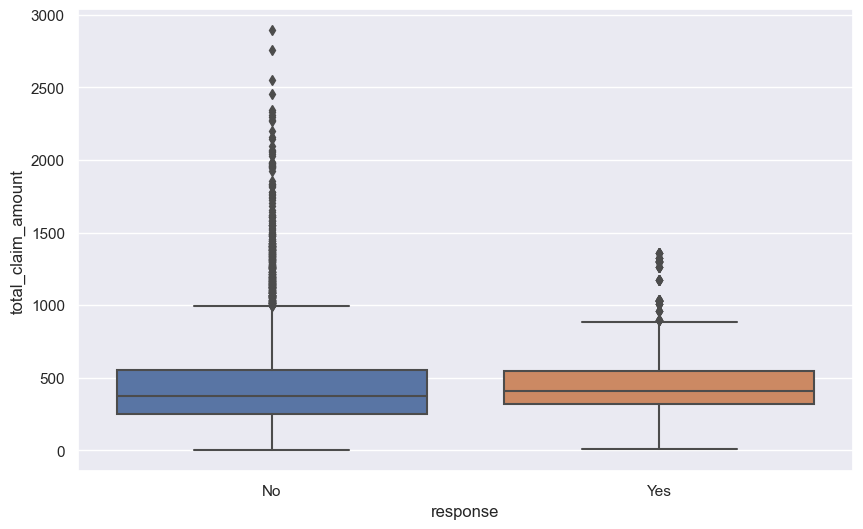

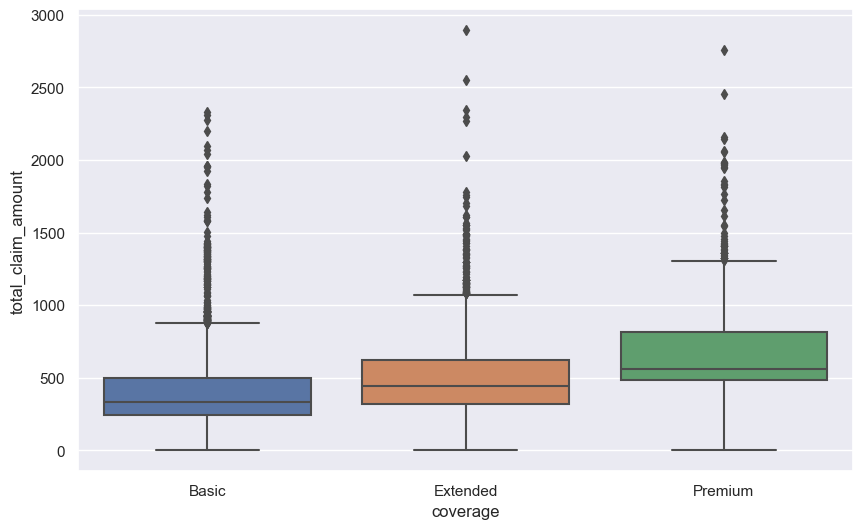

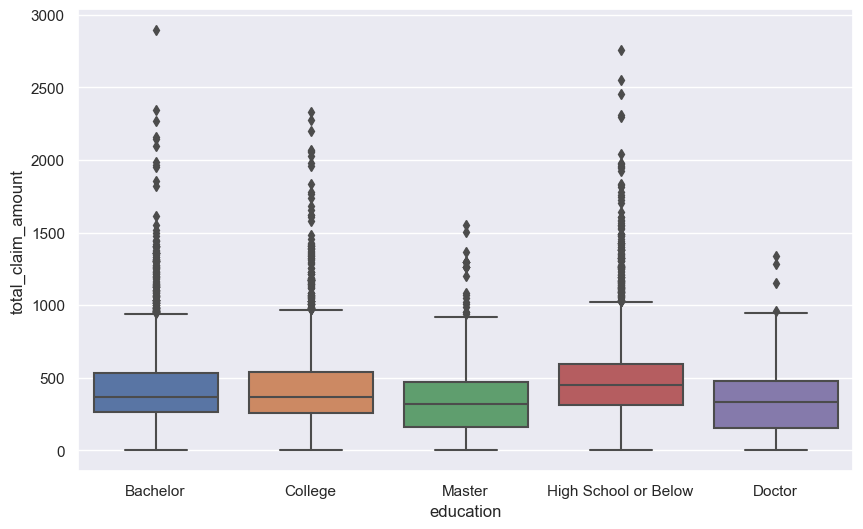

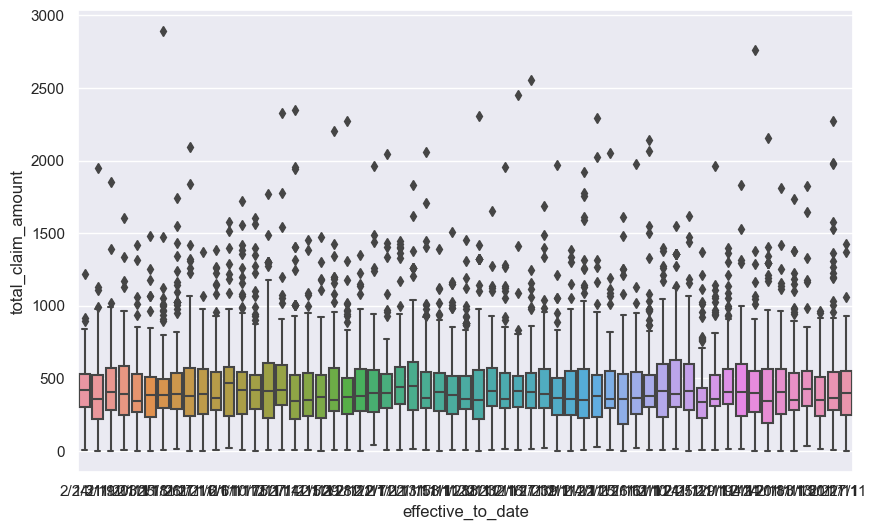

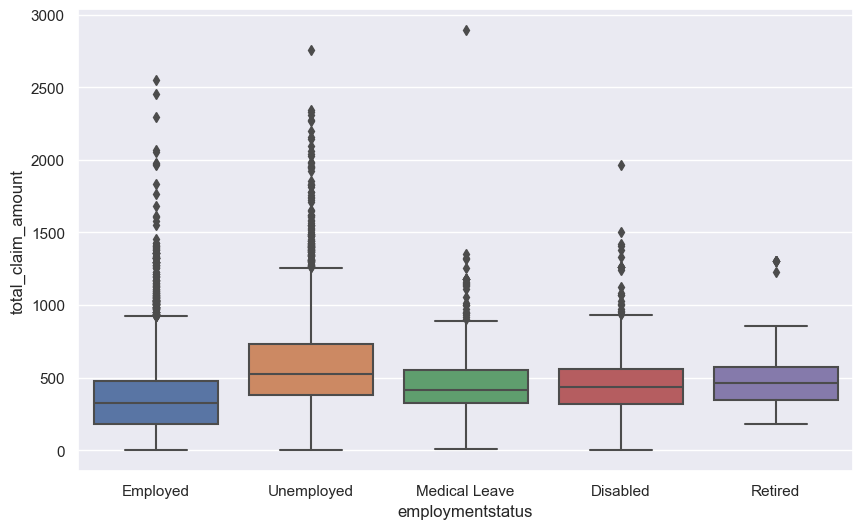

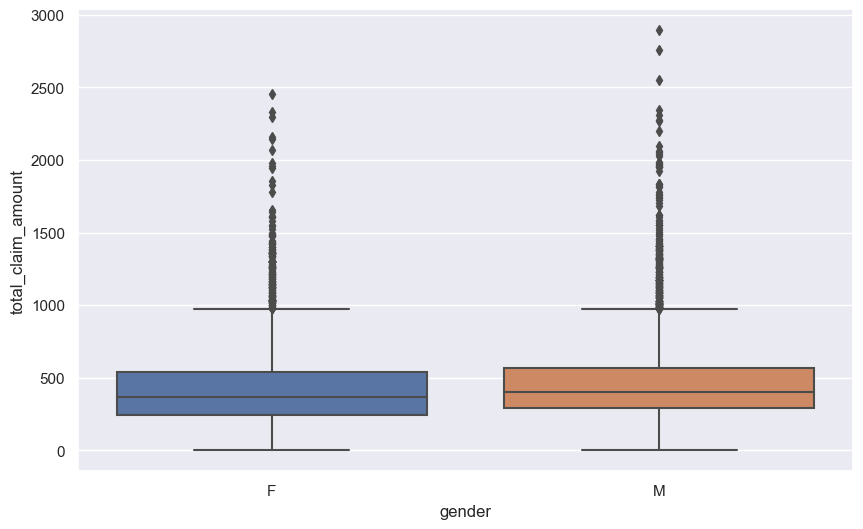

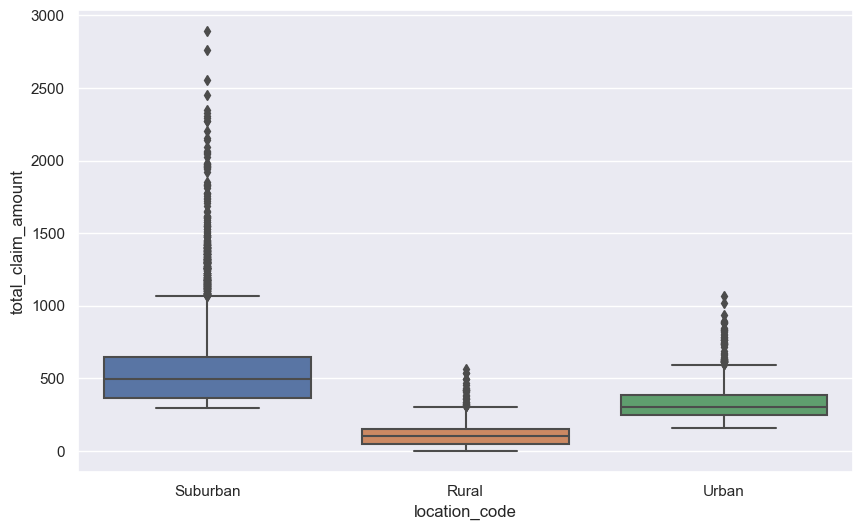

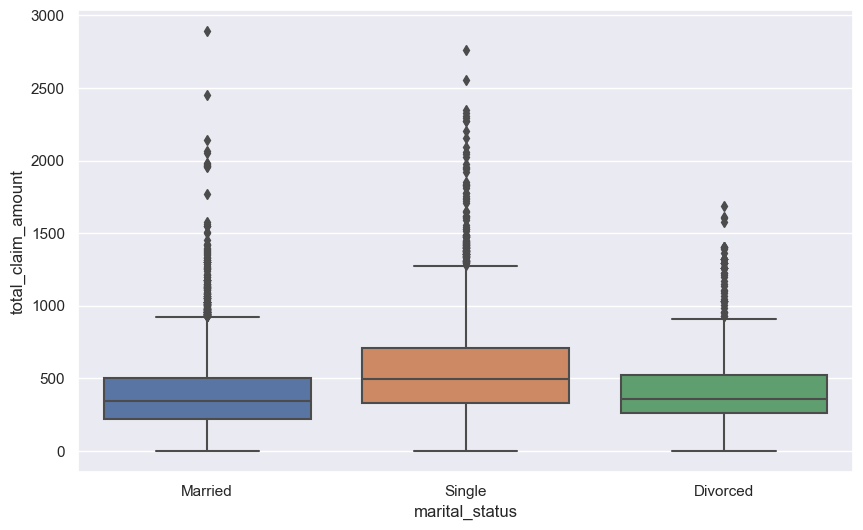

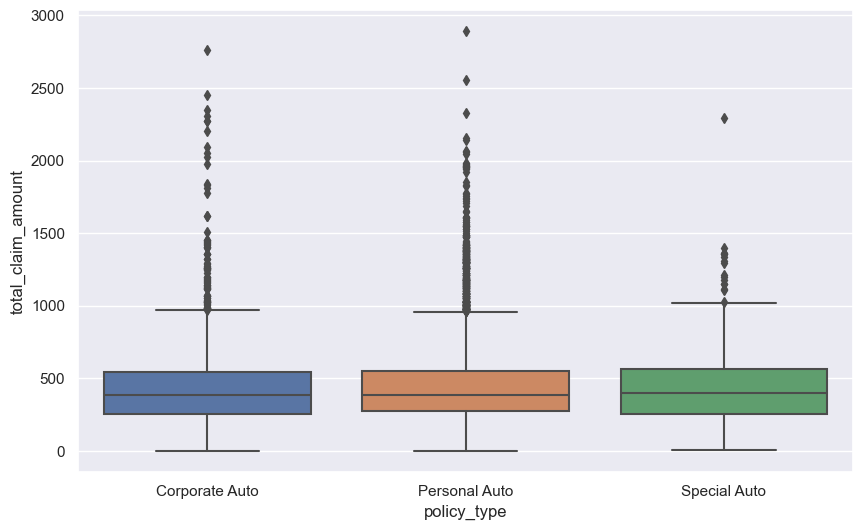

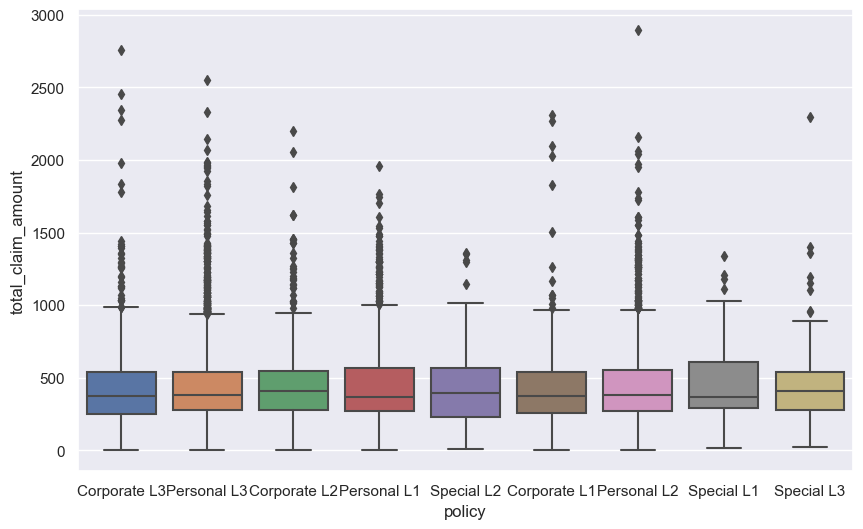

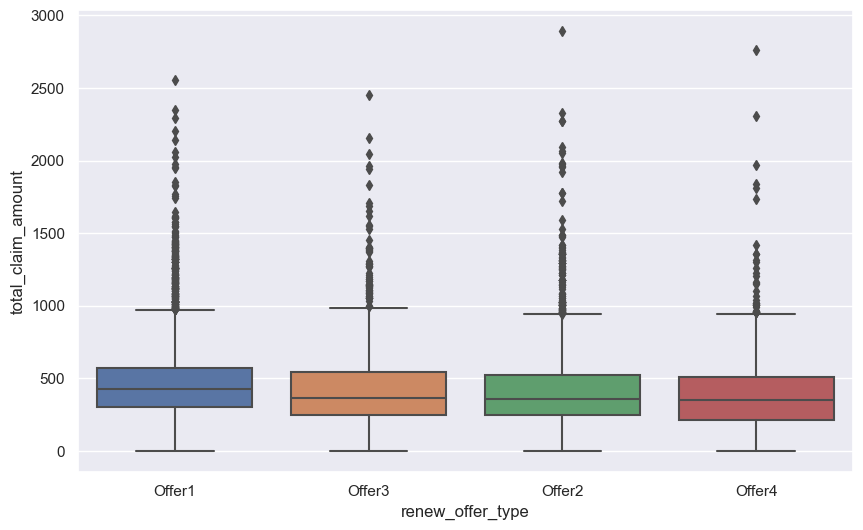

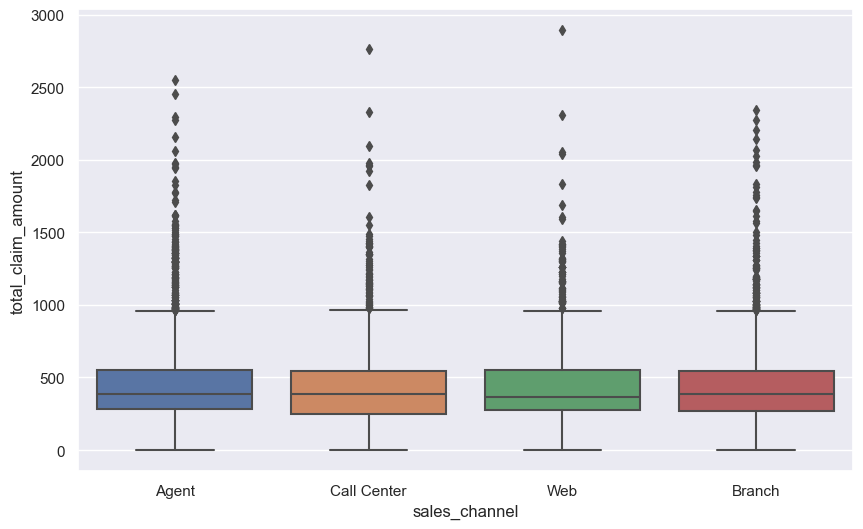

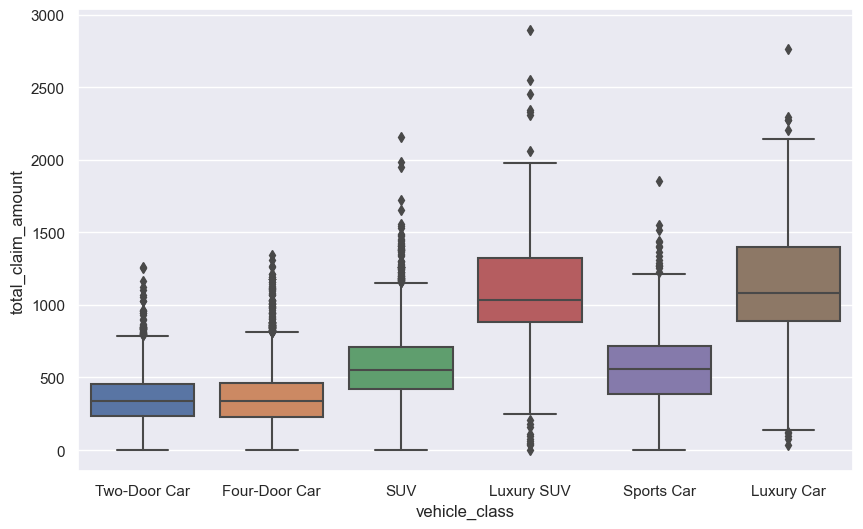

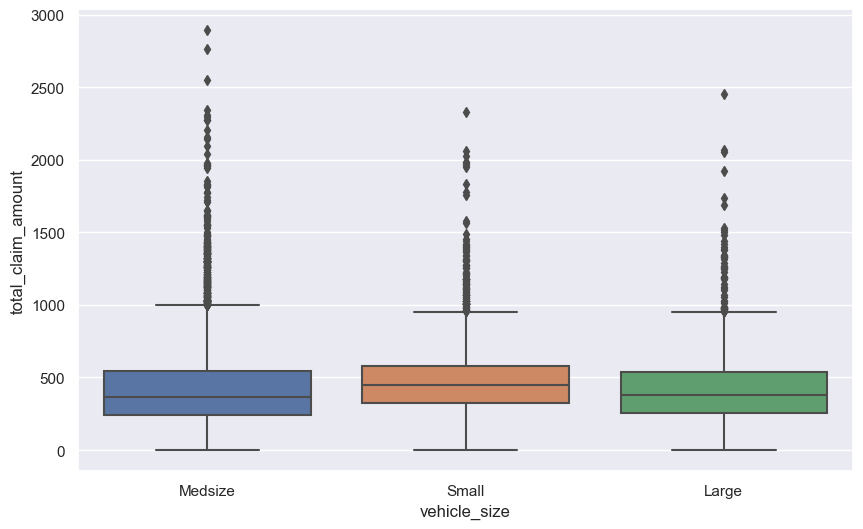

In [48]:
# Plot every categorical variable 
sns.set(rc={'figure.figsize':(10,6)})
for i in categorical.columns:
    sns.boxplot( x = categorical[i], y="total_claim_amount", data=customer_df )
    plt.show()

In [49]:
# - For the categorical data, check if there is any data cleaning that need to perform. 
# Hint: You can use the function value_counts() on each of the categorical columns and check the representation of different categories in each column. 
# Discuss if this information might in some way be used for data cleaning.

for i in categorical.columns:
    print('Name: {}'.format(categorical[i].name)) 
    print(categorical[i].value_counts())
    print('\n----------')

    # No tenemos valores nulos , ni typos, pero si muchos outliers (grafica de arriba)

Name: state
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

----------
Name: response
No     7826
Yes    1308
Name: response, dtype: int64

----------
Name: coverage
Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

----------
Name: education
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

----------
Name: effective_to_date
1/10/11    195
1/27/11    194
2/14/11    186
1/26/11    181
1/17/11    180
1/19/11    179
1/31/11    178
1/3/11     178
1/20/11    173
2/26/11    169
1/28/11    169
2/19/11    168
1/5/11     167
2/27/11    167
1/11/11    166
2/4/11     164
2/10/11    161
2/28/11    161
1/2/11     160
1/21/11    160
1/29/11    160
2/22/11    158
2/5/11     158
2/3/11     158
2/7/11     157
2/12/11    156
1/23/11    155
2/1/11     154
1/18/11    154
1/15/1

# <font color='orange'>Lab | Feature extraction  </font>

Instructions
- Open the categoricals variable we created before.
- categoricals = data.select_dtypes(np.object)
- categoricals.head()
- Plot all the categorical variables with the proper plot. What can you see?
- There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?
- Plot time variable. Can you extract something from it?

In [50]:
categorical.head()

,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


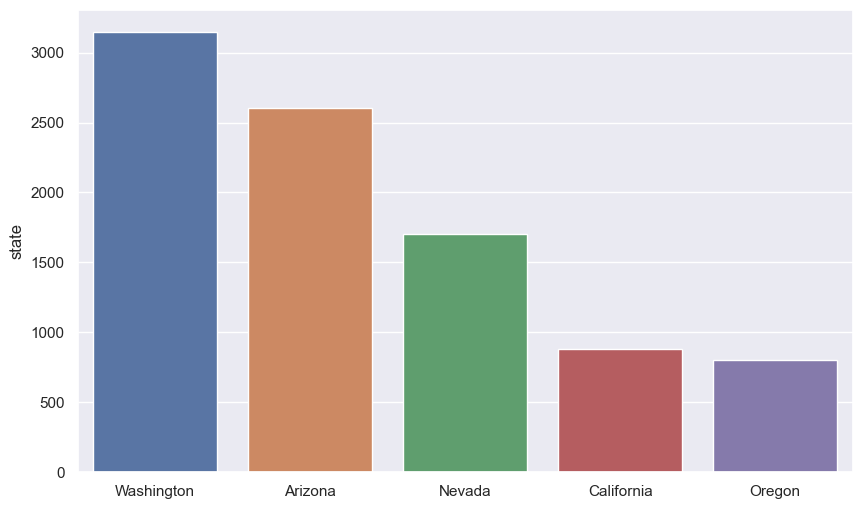

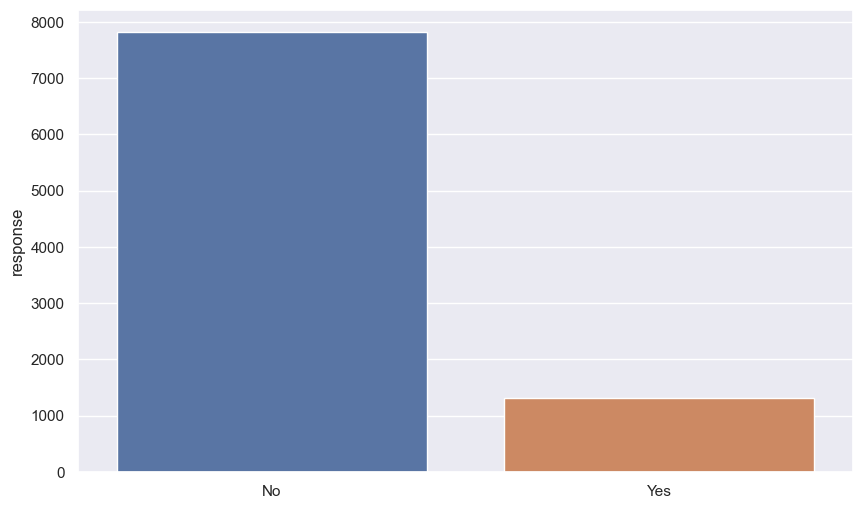

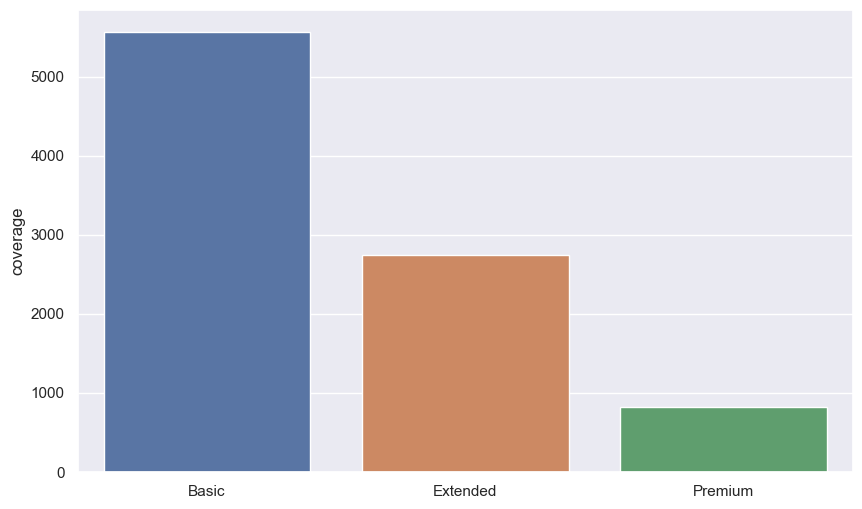

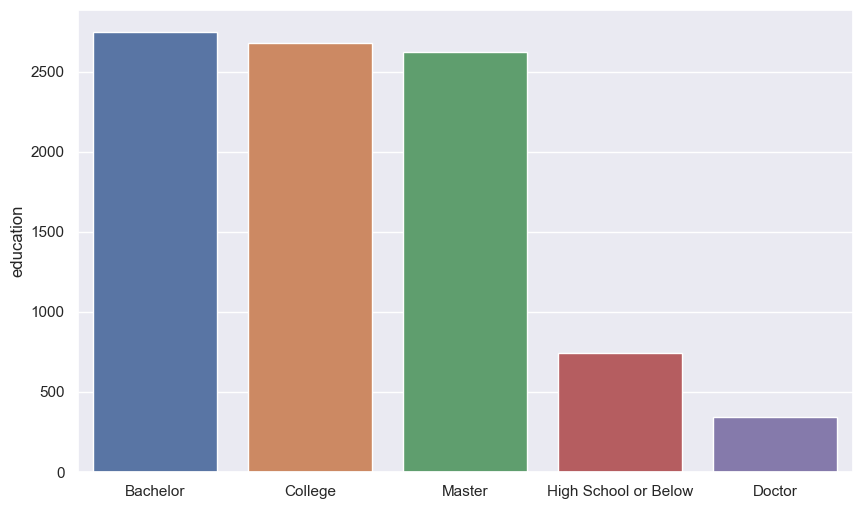

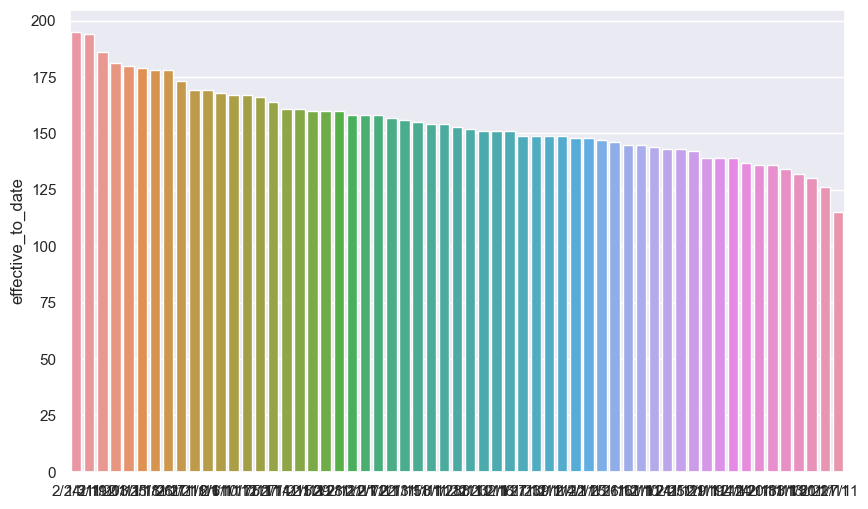

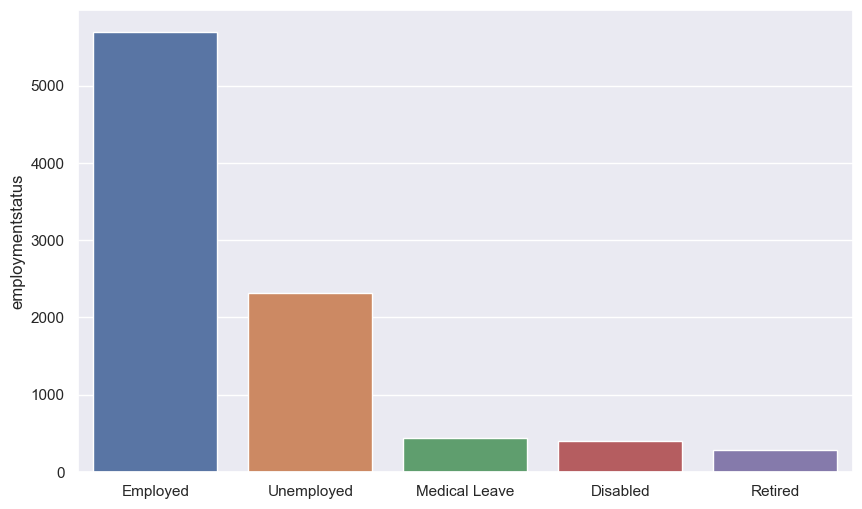

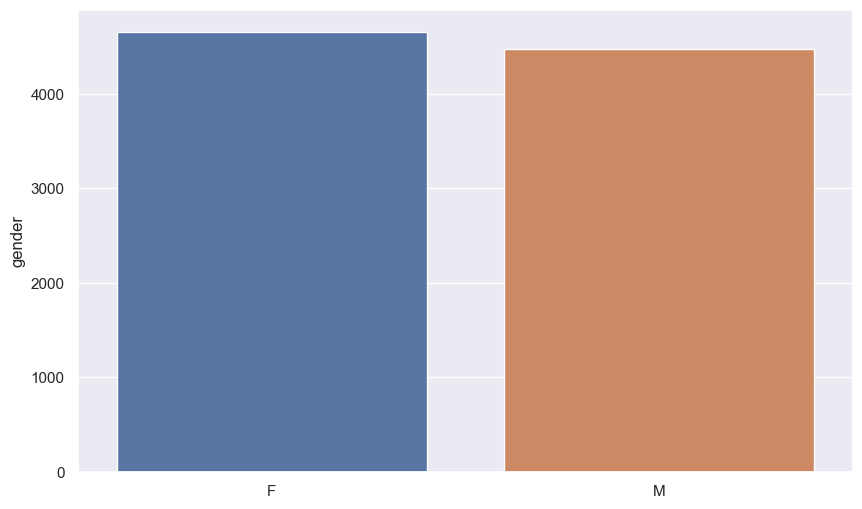

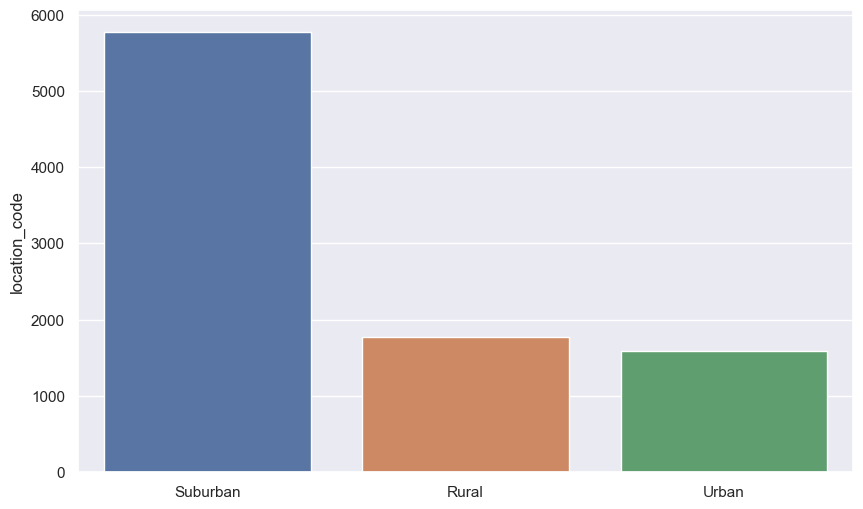

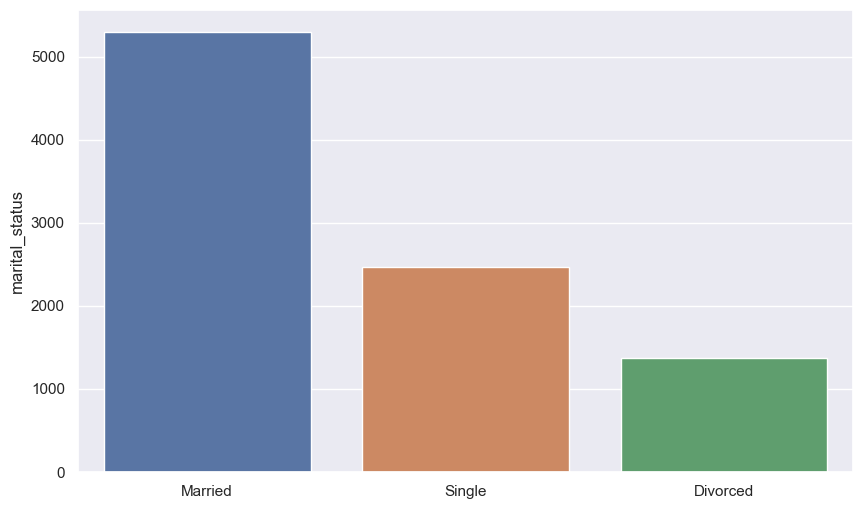

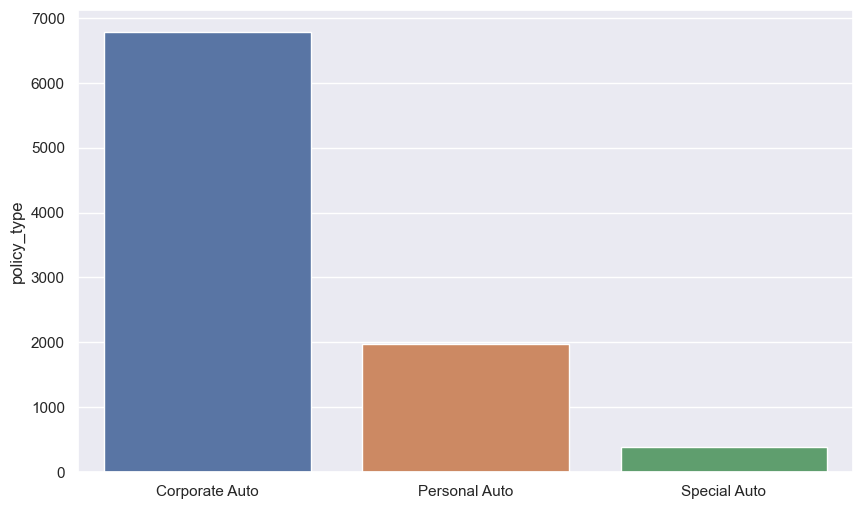

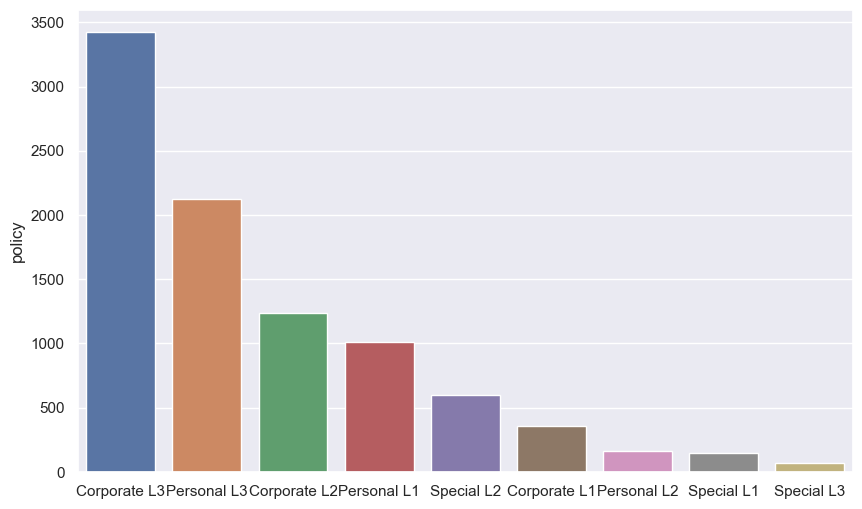

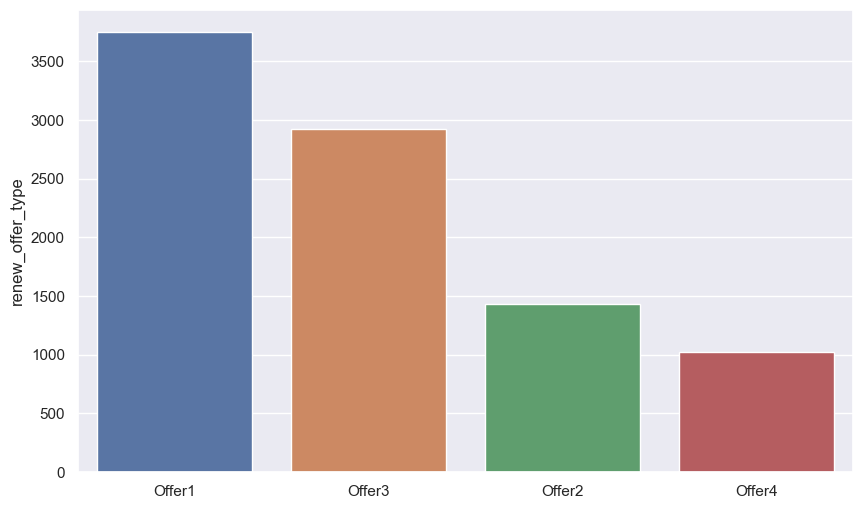

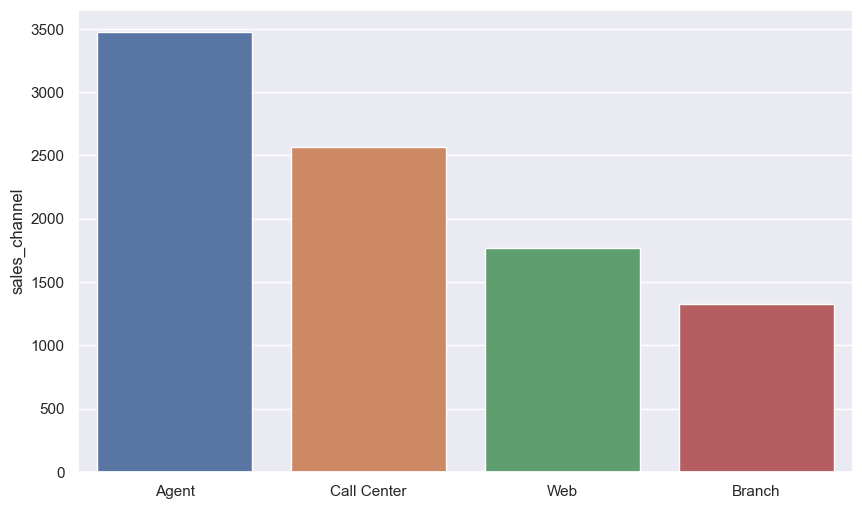

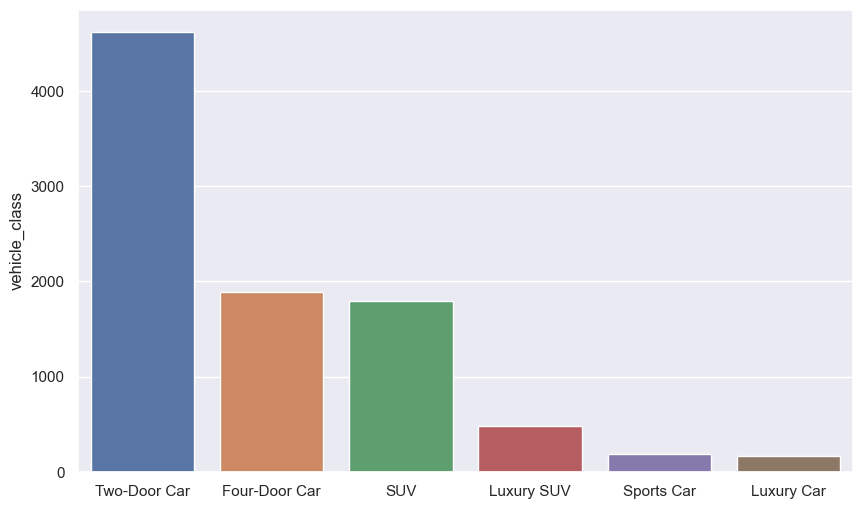

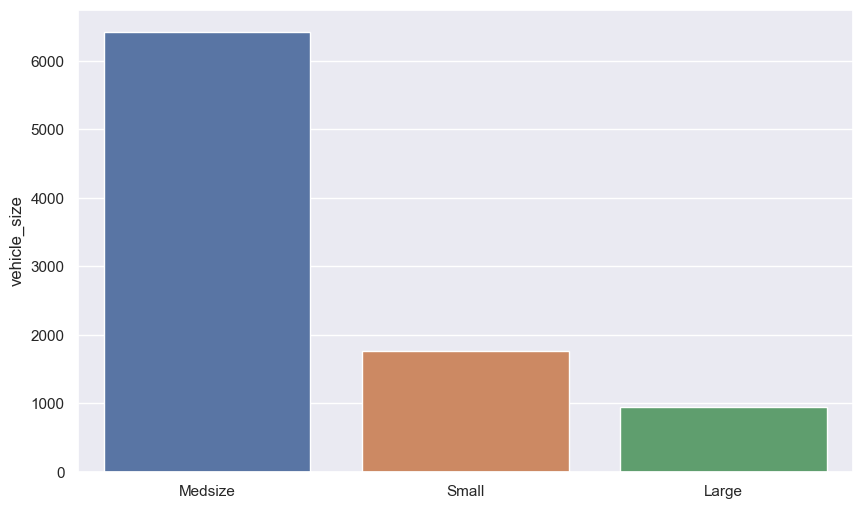

In [51]:

# Plot all the categorical variables with the proper plot. What can you see?
sns.set(rc={'figure.figsize':(10,6)})
for i in categorical.columns:
    sns.barplot(x=categorical[i].unique() , y=categorical[i].value_counts() , data=customer_df)
    plt.show()

In [52]:
# - There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?
# policy tipe y policy contienen la misma informacion, solo que policy, la tiene mas detallada asi que no es necesario quedasrnos con las dos 

customer_df=customer_df.drop(['policy_type'],axis=1)
customer_df.head()


,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,32,5,0,1,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,13,42,0,8,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,18,38,0,2,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,18,65,0,7,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,12,44,0,1,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [53]:
# Vamos a revisar los valores unicos de cada una de las variables categoricas para ver si podemos agrupar algunos caracteristicas
for i in categorical.columns:
    print('Name: {}'.format(categorical[i].name)) 
    print(categorical[i].value_counts())
    print('\n----------')

Name: state
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

----------
Name: response
No     7826
Yes    1308
Name: response, dtype: int64

----------
Name: coverage
Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

----------
Name: education
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

----------
Name: effective_to_date
1/10/11    195
1/27/11    194
2/14/11    186
1/26/11    181
1/17/11    180
1/19/11    179
1/31/11    178
1/3/11     178
1/20/11    173
2/26/11    169
1/28/11    169
2/19/11    168
1/5/11     167
2/27/11    167
1/11/11    166
2/4/11     164
2/10/11    161
2/28/11    161
1/2/11     160
1/21/11    160
1/29/11    160
2/22/11    158
2/5/11     158
2/3/11     158
2/7/11     157
2/12/11    156
1/23/11    155
2/1/11     154
1/18/11    154
1/15/1

In [54]:
# Podemos observar que  en la columna policy Special L2 tiene 164 valores , special L3 tiene 148 y Special L1 tiene 66, por lo que podriamos agruparlos en una sola categoria llamada Special
def cleanPolicy (x):
    if x in['Special L1','Special L2','Special L3']: return 'Special'
    else: return x
customer_df['policy']=list(map(cleanPolicy, customer_df['policy']))    

In [55]:
customer_df['policy'].value_counts()

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Special          378
Corporate L1     359
Name: policy, dtype: int64

<AxesSubplot:ylabel='policy'>

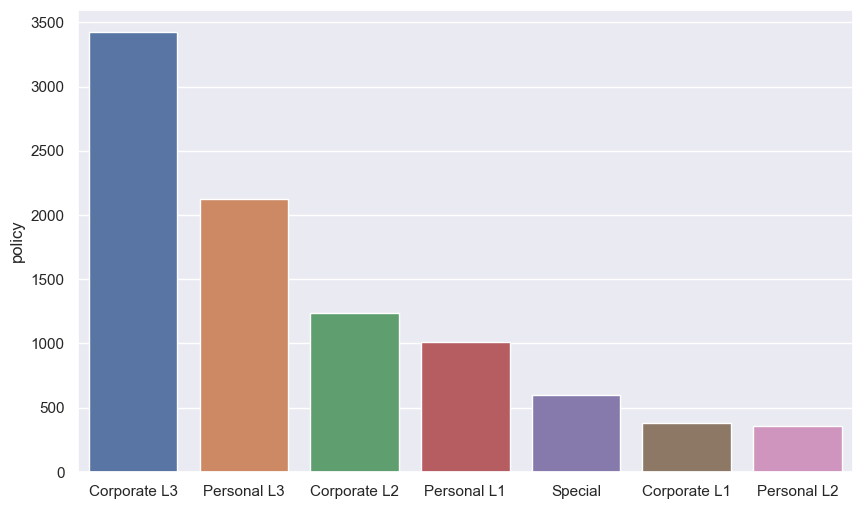

In [56]:
sns.barplot(x=customer_df['policy'].unique() , y=customer_df['policy'].value_counts() , data=customer_df)

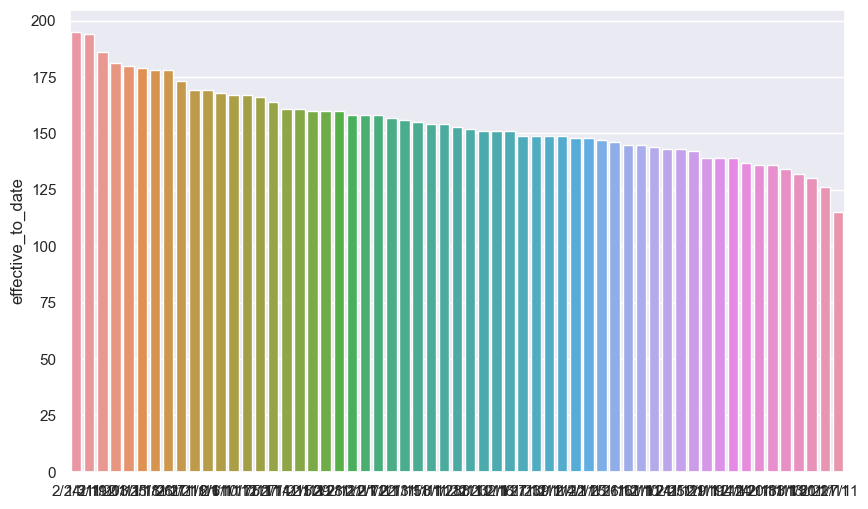

In [57]:
# Plot time variable. Can you extract something from it?
sns.barplot(x=customer_df['effective_to_date'].unique() , y=customer_df['effective_to_date'].value_counts() , data=customer_df)
plt.show()
# Debido a que tenemos la columna  con datos diarios, no podemos realmente obtener mucha informacion de ella, por lo que sacaremos una columna del mes y del  año

In [58]:
# Vamos a poner una columna Year que solo nos muestre los años
customer_df['year'] = pd.DatetimeIndex(customer_df['effective_to_date']).year
customer_df

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,year
0,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,5,0,1,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2011
1,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,42,0,8,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,2011
2,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,38,0,2,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2011
3,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,65,0,7,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,2011
4,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,44,0,1,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,...,89,0,2,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,2011
9130,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,...,28,0,1,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,2011
9131,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,...,37,3,2,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,2011
9132,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,...,3,0,3,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,2011


In [59]:
# Vamos a poner una columna Year que solo nos muestre los nombres de los meses
customer_df['month'] = pd.DatetimeIndex(customer_df['effective_to_date']).month_name().str.slice(stop=3)
customer_df

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,number_of_open_complaints,number_of_policies,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,year,month
0,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,0,1,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2011,Feb
1,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,0,8,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,2011,Jan
2,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,0,2,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2011,Feb
3,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,0,7,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,2011,Jan
4,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,0,1,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2011,Feb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,...,0,2,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,2011,Feb
9130,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,...,0,1,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,2011,Feb
9131,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,...,3,2,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,2011,Feb
9132,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,...,0,3,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,2011,Feb


In [60]:
# Eliminamos la columna Effective_to_date
customer_df=customer_df.drop(['effective_to_date'], axis=1)
customer_df.head()

,state,customer_lifetime_value,response,coverage,education,employmentstatus,gender,income,location_code,marital_status,...,number_of_open_complaints,number_of_policies,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,year,month
0,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,...,0,1,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2011,Feb
1,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,...,0,8,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,2011,Jan
2,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,...,0,2,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2011,Feb
3,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,...,0,7,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,2011,Jan
4,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,...,0,1,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2011,Feb


In [65]:
customer_df['month'].value_counts()


Jan    4898
Feb    4236
Name: month, dtype: int64

<AxesSubplot:ylabel='month'>

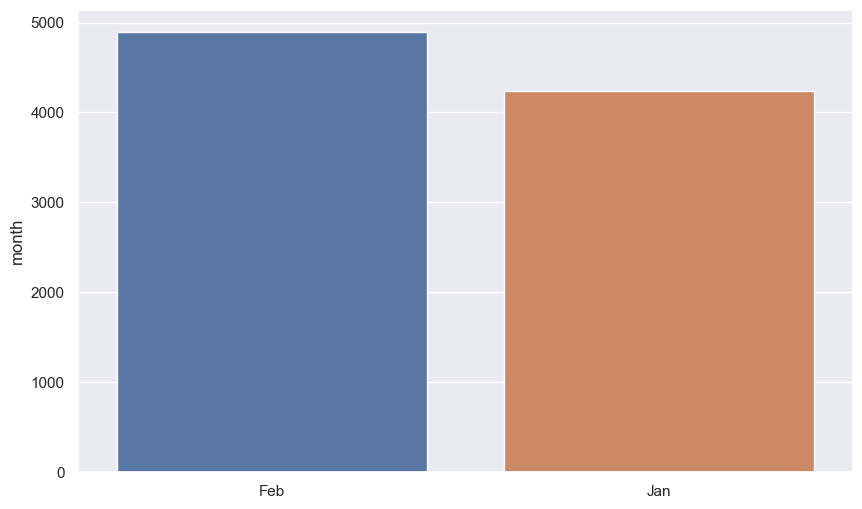

In [68]:
sns.barplot(x=customer_df['month'].unique() , y=customer_df['month'].value_counts() , data=customer_df)

In [70]:
customer_df['year'].value_counts()
# En este caso la data es del mismo año, bien podriamos eliminarlo

2011    9134
Name: year, dtype: int64